Iteración | x_n      | Error absoluto | Error relativo | Error cuadrático
-----------------------------------------------------------------------
        1 | 1.870829 | 3.708287e-01 | 1.982163e-01 | 1.375139e-01
        2 | 2.147670 | 2.768412e-01 | 1.289031e-01 | 7.664106e-02
        3 | 2.333026 | 1.853560e-01 | 7.944874e-02 | 3.435683e-02
        4 | 2.449301 | 1.162756e-01 | 4.747296e-02 | 1.352001e-02
        5 | 2.519505 | 7.020333e-02 | 2.786394e-02 | 4.928507e-03
        6 | 2.560960 | 4.145487e-02 | 1.618724e-02 | 1.718506e-03
        7 | 2.585126 | 2.416683e-02 | 9.348414e-03 | 5.840358e-04
        8 | 2.599111 | 1.398479e-02 | 5.380606e-03 | 1.955745e-04
        9 | 2.607170 | 8.058417e-03 | 3.090868e-03 | 6.493809e-05
       10 | 2.611802 | 4.632187e-03 | 1.773560e-03 | 2.145715e-05
       11 | 2.614461 | 2.658986e-03 | 1.017030e-03 | 7.070207e-06
       12 | 2.615986 | 1.525101e-03 | 5.829927e-04 | 2.325932e-06
       13 | 2.616860 | 8.743430e-04 | 3.341191e-04 | 7.644756e

<ipython-input-1-25f87ea7dc20>:10: RuntimeWarning: invalid value encountered in sqrt
  return (3*x - 1) ** (1/2)  # Transformación de la ecuación f(x) = 0 en x = g(x)


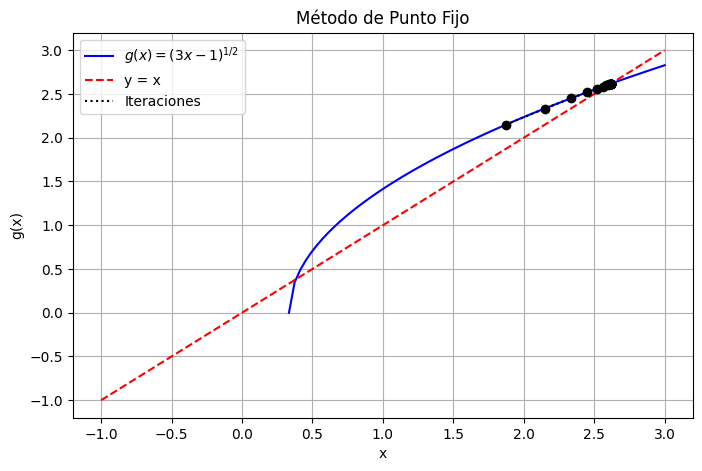

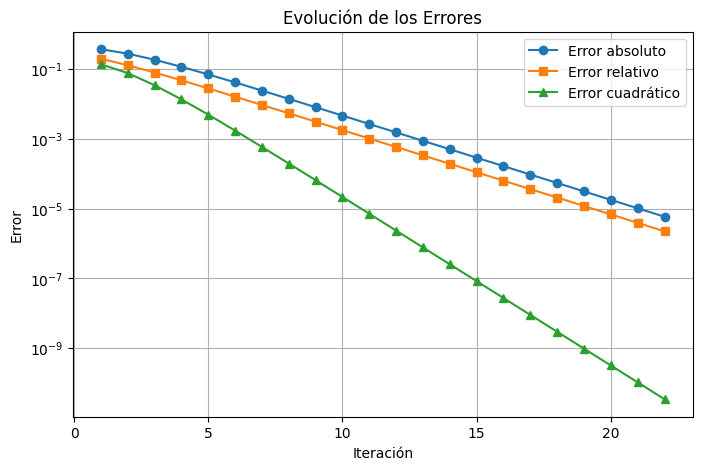

In [1]:


import numpy as np
import matplotlib.pyplot as plt

# Definir la función g(x) para el método de punto fijo
def g(x):
    return (3*x - 1) ** (1/2)  # Transformación de la ecuación f(x) = 0 en x = g(x)

# Criterio de convergencia: g'(x) debe cumplir |g'(x)| < 1 para asegurar convergencia
def g_prime(x):
    return (3/2) * (3*x - 1) ** (-1/2)

# Función para calcular el error absoluto
def error_absoluto(x_new, x_old):
    return abs(x_new - x_old)

# Función para calcular el error relativo
def error_relativo(x_new, x_old):
    return abs((x_new - x_old) / x_new)

# Función para calcular el error cuadrático
def error_cuadratico(x_new, x_old):
    return (x_new - x_old) ** 2

# Implementación del método de punto fijo
def punto_fijo(x0, tol=1e-5, max_iter=100):
    iteraciones = []  # Lista para almacenar los resultados de cada iteración
    errores_abs = []   # Lista para el error absoluto
    errores_rel = []   # Lista para el error relativo
    errores_cuad = []  # Lista para el error cuadrático

    x_old = x0  # Valor inicial dado por el usuario

    for i in range(max_iter):  # Ciclo de iteraciones hasta alcanzar la tolerancia o el máximo de iteraciones
        x_new = g(x_old)  # Aplicar la función g(x)

        # Calcular los errores
        e_abs = error_absoluto(x_new, x_old)
        e_rel = error_relativo(x_new, x_old)
        e_cuad = error_cuadratico(x_new, x_old)

        # Guardar los resultados de la iteración
        iteraciones.append((i+1, x_new, e_abs, e_rel, e_cuad))
        errores_abs.append(e_abs)
        errores_rel.append(e_rel)
        errores_cuad.append(e_cuad)

        # Criterio de parada: si el error absoluto es menor que la tolerancia, detener
        if e_abs < tol:
            break

        x_old = x_new  # Actualizar el valor de x para la siguiente iteración

    return iteraciones, errores_abs, errores_rel, errores_cuad

# Parámetro inicial para el método de punto fijo
x0 = 1.5

# Ejecutar el método y almacenar resultados
iteraciones, errores_abs, errores_rel, errores_cuad = punto_fijo(x0)

# Imprimir la tabla de iteraciones con los errores correspondientes
print("Iteración | x_n      | Error absoluto | Error relativo | Error cuadrático")
print("-----------------------------------------------------------------------")
for it in iteraciones:
    print(f"{it[0]:9d} | {it[1]:.6f} | {it[2]:.6e} | {it[3]:.6e} | {it[4]:.6e}")

# Graficar la función g(x) junto con la línea y = x para visualizar la convergencia
x_vals = np.linspace(-1, 3, 100)  # Rango de valores de x
y_vals = g(x_vals)  # Evaluación de g(x) en el rango dado

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r"$g(x) = (3x - 1)^{1/2}$", color="blue")  # Gráfica de g(x)
plt.plot(x_vals, x_vals, linestyle="dashed", color="red", label="y = x")  # Línea y = x

# Graficar los puntos de iteraciones
x_points = [it[1] for it in iteraciones]
y_points = [g(x) for x in x_points]
plt.scatter(x_points, y_points, color="black", zorder=3)
plt.plot(x_points, y_points, linestyle="dotted", color="black", label="Iteraciones")

# Configuración de la gráfica
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.grid(True)
plt.title("Método de Punto Fijo")
plt.savefig("punto_fijo_convergencia.png")  # Guardar la imagen de la gráfica
plt.show()

# Graficar la evolución de los errores en escala logarítmica
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(errores_abs) + 1), errores_abs, marker="o", label="Error absoluto")
plt.plot(range(1, len(errores_rel) + 1), errores_rel, marker="s", label="Error relativo")
plt.plot(range(1, len(errores_cuad) + 1), errores_cuad, marker="^", label="Error cuadrático")

# Configuración de la gráfica de errores
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.yscale("log")  # Escala logarítmica para visualizar mejor la convergencia
plt.legend()
plt.grid(True)
plt.title("Evolución de los Errores")
plt.savefig("errores_punto_fijo.png")  # Guardar la gráfica de errores
plt.show()